#### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### This line imports the healthcare dataset from a CSV file into a pandas DataFrame, allowing it to be viewed and used for data exploration, preprocessing, and model development.

In [3]:
df = pd.read_csv('AI_in_HealthCare_Dataset_Project.csv')
df

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X_ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,No_Allergies,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,Female,121.637508,69.839584,98.196956,Diabetes,Insulin,6,Uninsured,Dr. Brown,Healthcare Clinic,91.223300,Normal,Appendectomy,9,Peanuts,Cancer,1,0.762071
4996,4997,77,Male,90.043729,80.782438,98.578032,Cancer,Antibiotics,10,Private,Dr. Johnson,Regional Hospital,112.273381,Normal,Gallbladder Removal,9,Penicillin,Hypertension,2,0.940696
4997,4998,26,Female,121.506747,72.340389,98.142521,Diabetes,Insulin,23,Medicaid,Dr. Lee,City Medical Center,82.035720,Abnormal,Cataract Surgery,2,Latex,Alzheimer's,1,0.935514
4998,4999,81,Female,130.388398,86.268489,96.224625,Heart Disease,Chemotherapy,4,Medicare,Dr. Brown,Regional Hospital,148.847731,Abnormal,Appendectomy,4,Shellfish,Heart Disease,1,0.818013


#### "This command generates a detailed summary of the dataset, including column names, data types, number of non-null entries, and memory usage, which helps assess data completeness and understand the structure before preprocessing."

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Blood_Pressure           5000 non-null   float64
 4   Heart_Rate               5000 non-null   float64
 5   Temperature              5000 non-null   float64
 6   Diagnosis                5000 non-null   object 
 7   Medication               5000 non-null   object 
 8   Treatment_Duration       5000 non-null   int64  
 9   Insurance_Type           5000 non-null   object 
 10  Doctor_Name              5000 non-null   object 
 11  Hospital_Name            5000 non-null   object 
 12  Lab_Test_Results         5000 non-null   float64
 13  X_ray_Results            5000 non-null   object 
 14  Surgery_Type            

#### This command shows key statistical measures for numerical columns, helping understand distribution and spot outliers.

In [5]:
df.describe()

,Patient_ID,Age,Blood_Pressure,Heart_Rate,Temperature,Treatment_Duration,Lab_Test_Results,Recovery_Time,Patient_Satisfaction,AI_Diagnosis_Confidence
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,53.433200,119.863621,74.755327,98.603710,14.965400,100.201480,4.944200,2.993600,0.843927
std,1443.520003,20.931669,15.055656,9.974505,1.002509,8.403495,19.813474,2.570994,1.417731,0.084355
min,1.000000,18.000000,61.940115,36.760595,94.930131,1.000000,24.567602,1.000000,1.000000,0.700017
25%,1250.750000,35.000000,109.896065,67.935319,97.929791,8.000000,86.769592,3.000000,2.000000,0.768968
50%,2500.500000,53.000000,119.772157,75.000152,98.618301,15.000000,100.473921,5.000000,3.000000,0.843321
75%,3750.250000,72.000000,129.893989,81.556148,99.265743,22.000000,113.730522,7.000000,4.000000,0.917418
max,5000.000000,89.000000,168.092063,117.198456,102.497318,29.000000,168.340588,9.000000,5.000000,0.989988


#### This command counts the number of missing values in each column to identify incomplete data.

In [6]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Blood_Pressure             0
Heart_Rate                 0
Temperature                0
Diagnosis                  0
Medication                 0
Treatment_Duration         0
Insurance_Type             0
Doctor_Name                0
Hospital_Name              0
Lab_Test_Results           0
X_ray_Results              0
Surgery_Type               0
Recovery_Time              0
Allergies                  0
Family_History             0
Patient_Satisfaction       0
AI_Diagnosis_Confidence    0
dtype: int64

#### This step separates the dataset into input features (X) and the target variable (y) to prepare for model training.

In [ ]:
X = df[['Age','Gender','Blood_Pressure','Heart_Rate','Temperature','Diagnosis','Lab_Test_Results',
        'X_ray_Results','Surgery_Type','Allergies','Family_History']]
y = df['Medication']

#### This code applies StandardScaler to numerical columns to normalize their values, ensuring all features share a similar scale for better model performance.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()

In [10]:
num_col = X.select_dtypes(include = np.number)
for col in num_col:
    X[col] = scale.fit_transform(X[[col]])

D:\Temp\ipykernel_21448\2291417749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = scale.fit_transform(X[[col]])
D:\Temp\ipykernel_21448\2291417749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = scale.fit_transform(X[[col]])
D:\Temp\ipykernel_21448\2291417749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [11]:
X

,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Lab_Test_Results,X_ray_Results,Surgery_Type,Allergies,Family_History
0,0.409316,Female,-1.163432,0.508536,0.307910,Hypertension,0.742229,Abnormal,Appendectomy,Latex,Heart Disease
1,0.552653,Male,1.188862,-0.194303,0.308056,Hypertension,-0.587765,Normal,Knee Replacement,Shellfish,Diabetes
2,1.364901,Male,-1.477669,-1.766671,0.584610,Influenza,0.328272,Normal,Gallbladder Removal,No_Allergies,Hypertension
3,1.508239,Male,0.124891,-0.741914,-2.564046,Heart Disease,-0.866074,Normal,Cataract Surgery,Latex,Hypertension
4,1.508239,Male,0.642137,-0.993222,0.472826,Heart Disease,-0.739856,Abnormal,Appendectomy,Shellfish,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.259594,Female,0.117834,-0.492880,-0.405776,Diabetes,-0.453180,Normal,Appendectomy,Peanuts,Cancer
4996,1.126005,Male,-1.980842,0.604312,-0.025616,Cancer,0.609338,Normal,Gallbladder Removal,Penicillin,Hypertension
4997,-1.310738,Female,0.109148,-0.242135,-0.460080,Diabetes,-0.916930,Abnormal,Cataract Surgery,Latex,Alzheimer's
4998,1.317122,Female,0.699128,1.154374,-2.373367,Heart Disease,2.455456,Abnormal,Appendectomy,Shellfish,Heart Disease


#### This code encodes all categorical feature columns using LabelEncoder, converting text values into numeric form and storing each encoder for future use.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoders = {}  

In [14]:
cat_columns = X.select_dtypes(include="object").columns
for col in cat_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le 

D:\Temp\ipykernel_21448\2229206309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
D:\Temp\ipykernel_21448\2229206309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
D:\Temp\ipykernel_21448\2229206309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [15]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [16]:
y

array([4, 3, 2, ..., 3, 2, 0])

In [17]:
X

,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Lab_Test_Results,X_ray_Results,Surgery_Type,Allergies,Family_History
0,0.409316,0,-1.163432,0.508536,0.307910,3,0.742229,0,1,0,3
1,0.552653,1,1.188862,-0.194303,0.308056,3,-0.587765,1,4,4,2
2,1.364901,1,-1.477669,-1.766671,0.584610,4,0.328272,1,3,1,4
3,1.508239,1,0.124891,-0.741914,-2.564046,2,-0.866074,1,2,0,4
4,1.508239,1,0.642137,-0.993222,0.472826,2,-0.739856,0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.259594,0,0.117834,-0.492880,-0.405776,1,-0.453180,1,1,2,1
4996,1.126005,1,-1.980842,0.604312,-0.025616,0,0.609338,1,3,3,4
4997,-1.310738,0,0.109148,-0.242135,-0.460080,1,-0.916930,0,2,0,0
4998,1.317122,0,0.699128,1.154374,-2.373367,2,2.455456,0,1,4,3


#### This step splits the dataset into training and testing sets, allocating 80% for training and 20% for evaluation while maintaining reproducibility using a fixed random state.

In [18]:
from sklearn.model_selection  import train_test_split

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [20]:
X_test

,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Lab_Test_Results,X_ray_Results,Surgery_Type,Allergies,Family_History
1501,-1.310738,0,-0.573880,1.103306,-1.009534,0,-1.575254,1,0,4,3
2586,1.317122,0,-0.391951,-0.980118,0.734407,3,-1.318077,1,4,3,2
2653,-0.307374,0,-0.402212,0.167392,1.018601,2,-0.195809,1,3,1,4
1055,-1.645193,0,-0.008153,-2.663816,0.418255,0,-0.031465,1,4,4,3
705,1.603797,0,-0.276339,0.904022,0.037744,2,-0.616090,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4711,0.074861,0,2.366068,-1.224824,0.750325,1,-1.918181,0,1,4,1
2313,-0.259594,1,0.620639,0.072290,-0.267804,1,-1.126029,0,4,1,4
3214,-1.692973,0,-0.247917,-0.381783,-0.108067,0,-1.060032,1,2,4,4
2732,-0.880725,0,-0.926405,2.434335,0.188143,0,0.560154,0,0,0,3


In [21]:
y_test

array([3, 1, 0, 4, 0, 4, 1, 0, 1, 4, 4, 4, 2, 4, 1, 1, 1, 1, 4, 2, 0, 1,
       2, 1, 1, 2, 4, 3, 3, 2, 0, 0, 0, 1, 1, 3, 1, 0, 1, 4, 4, 2, 4, 2,
       0, 4, 3, 0, 2, 2, 2, 4, 1, 4, 3, 3, 0, 1, 1, 1, 3, 0, 0, 1, 3, 0,
       3, 0, 2, 2, 2, 4, 3, 0, 4, 2, 4, 2, 3, 0, 0, 1, 4, 4, 1, 0, 2, 0,
       1, 3, 4, 0, 2, 3, 2, 4, 2, 4, 4, 1, 0, 3, 4, 0, 0, 2, 0, 0, 4, 1,
       1, 4, 1, 0, 2, 0, 2, 1, 1, 0, 2, 3, 2, 4, 2, 2, 4, 3, 1, 2, 1, 0,
       1, 4, 3, 1, 4, 2, 0, 1, 3, 2, 1, 0, 1, 1, 4, 0, 1, 3, 2, 2, 3, 4,
       1, 1, 3, 3, 0, 2, 0, 0, 2, 2, 4, 2, 3, 2, 4, 0, 3, 2, 3, 3, 1, 1,
       0, 3, 0, 3, 1, 0, 1, 3, 1, 0, 4, 4, 4, 0, 3, 3, 1, 0, 2, 2, 4, 3,
       0, 3, 1, 1, 0, 2, 3, 4, 4, 2, 0, 0, 3, 0, 1, 3, 1, 0, 0, 3, 2, 1,
       4, 1, 2, 0, 4, 1, 1, 3, 3, 1, 3, 4, 0, 3, 4, 1, 2, 3, 4, 4, 0, 2,
       1, 4, 4, 0, 3, 3, 4, 4, 3, 0, 4, 4, 0, 2, 4, 1, 2, 2, 1, 4, 2, 3,
       2, 3, 0, 0, 0, 4, 2, 1, 2, 3, 3, 4, 3, 0, 3, 2, 1, 2, 3, 3, 1, 0,
       2, 1, 1, 2, 0, 4, 3, 2, 1, 1, 1, 4, 4, 4, 0,

#### This section initializes a Random Forest classifier and defines a parameter grid for hyperparameter tuning to improve model performance.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier()

In [24]:
params = {
   'n_estimators': [50, 100, 200],  
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'max_depth' : [None , 3 , 5 , 10 , 20],
    'min_samples_split' : [2 , 5 , 4 , 6 , 10],
    'min_samples_leaf' : [1 , 2 , 4 , 8],
    'max_features' : ['sqrt' , 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

#### This creates a 5-fold stratified cross-validation splitter to ensure each fold maintains the same class distribution while shuffling for balanced and reliable evaluation.

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
skf = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 42)

#### This code performs randomized hyperparameter search using cross-validation to find the best Random Forest model settings based on accuracy, and then trains it on the training data.

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
grid = RandomizedSearchCV(estimator = rf , param_distributions = params , cv = skf , scoring = "accuracy" , n_jobs = -1)
grid.fit(X_train , y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 3, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


#### This generates predictions on the test dataset using the optimized model obtained from hyperparameter tuning

In [29]:
y_pred = grid.predict(X_test)
y_pred

array([4, 1, 1, 4, 3, 4, 4, 0, 2, 0, 4, 2, 0, 2, 3, 0, 0, 1, 3, 1, 2, 2,
       0, 1, 1, 1, 4, 3, 1, 3, 3, 0, 4, 0, 2, 2, 0, 3, 2, 2, 4, 1, 1, 4,
       1, 2, 2, 4, 4, 4, 0, 2, 4, 1, 4, 2, 4, 1, 2, 0, 3, 4, 0, 2, 2, 0,
       1, 3, 3, 0, 3, 4, 2, 2, 4, 1, 4, 0, 4, 2, 1, 0, 3, 1, 4, 2, 4, 1,
       3, 4, 3, 2, 2, 0, 0, 1, 3, 3, 1, 2, 1, 2, 4, 0, 3, 4, 1, 0, 1, 3,
       0, 0, 1, 2, 2, 4, 1, 4, 4, 3, 2, 0, 2, 0, 1, 3, 0, 3, 0, 1, 2, 3,
       1, 4, 4, 2, 4, 3, 4, 0, 1, 4, 3, 2, 1, 0, 1, 2, 0, 1, 1, 2, 3, 4,
       2, 2, 1, 3, 4, 4, 3, 4, 3, 3, 0, 0, 2, 2, 1, 0, 4, 4, 1, 4, 0, 4,
       4, 4, 2, 0, 2, 3, 3, 4, 2, 0, 1, 0, 4, 4, 4, 0, 3, 0, 3, 0, 0, 3,
       2, 3, 4, 3, 3, 0, 4, 4, 3, 1, 1, 1, 2, 2, 2, 4, 3, 1, 2, 0, 2, 1,
       3, 2, 3, 3, 4, 0, 4, 2, 1, 3, 4, 4, 0, 1, 2, 0, 2, 3, 2, 3, 2, 2,
       2, 0, 4, 1, 2, 3, 2, 1, 3, 4, 4, 1, 3, 0, 0, 4, 2, 4, 3, 2, 0, 1,
       3, 2, 2, 3, 2, 4, 1, 1, 1, 1, 4, 4, 0, 0, 3, 1, 2, 2, 1, 3, 3, 0,
       3, 4, 0, 0, 4, 1, 0, 3, 2, 4, 0, 0, 1, 0, 4,

#### This imports evaluation metrics and tools needed to measure model performance, including accuracy, precision, recall, ROC curve, and confusion matrix.

In [30]:
from sklearn.metrics import accuracy_score , classification_report ,precision_score , recall_score , roc_curve , confusion_matrix

#### This calculates the model’s prediction accuracy by comparing predicted labels with actual test labels.

In [31]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.204

#### This computes the macro-averaged precision, measuring the model’s ability to correctly identify each class across all classes.

In [32]:
precision = precision_score(y_test , y_pred , average = "macro")
precision

0.20191441255374812

#### This calculates the macro-averaged recall, indicating the model’s ability to capture all relevant instances across each class.

In [33]:
recall = recall_score(y_test , y_pred , average = "macro")
recall

0.20443727441953405

#### This generates the confusion matrix, showing the counts of true vs. predicted labels to evaluate model classification performance

In [34]:
conf_matrix = confusion_matrix(y_test , y_pred)
conf_matrix

array([[35, 38, 40, 44, 57],
       [40, 34, 43, 39, 43],
       [46, 30, 38, 45, 45],
       [32, 36, 30, 38, 43],
       [35, 40, 34, 36, 59]], dtype=int64)

#### This visualizes the confusion matrix as a heatmap, making it easier to interpret the model’s correct and incorrect predictions across classes.

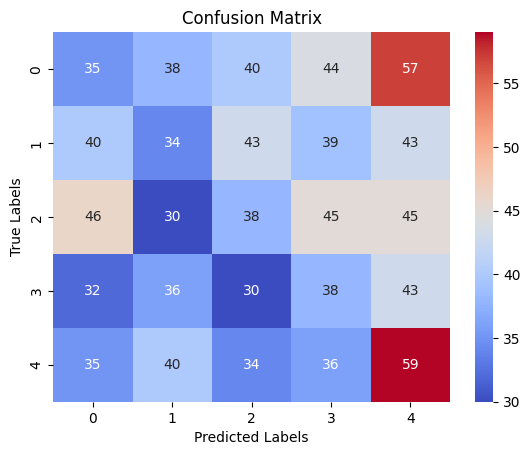

In [35]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### This prints a detailed classification report, showing precision, recall, F1-score, and support for each class to assess model performance.

In [36]:
report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.19      0.16      0.17       214
           1       0.19      0.17      0.18       199
           2       0.21      0.19      0.20       204
           3       0.19      0.21      0.20       179
           4       0.24      0.29      0.26       204

    accuracy                           0.20      1000
   macro avg       0.20      0.20      0.20      1000
weighted avg       0.20      0.20      0.20      1000



#### This computes the predicted class probabilities for the test data, providing the likelihood of each class for every sample.

In [37]:
y_prob = grid.predict_proba(X_test)
y_prob

array([[0.23136754, 0.17243944, 0.14389083, 0.18408507, 0.26821713],
       [0.19409155, 0.22589936, 0.21018669, 0.16991311, 0.19990929],
       [0.19962956, 0.21317545, 0.19241435, 0.21065635, 0.18412429],
       ...,
       [0.19604271, 0.22818378, 0.17141146, 0.17721848, 0.22714357],
       [0.20084716, 0.20290808, 0.19346591, 0.17237021, 0.23040864],
       [0.16565907, 0.22483143, 0.16072115, 0.16796867, 0.28081968]])

In [38]:
from sklearn.preprocessing import label_binarize

#### This code plots the multi-class ROC curves and computes AUC for each class, visually evaluating the classifier’s ability to distinguish between different classes.

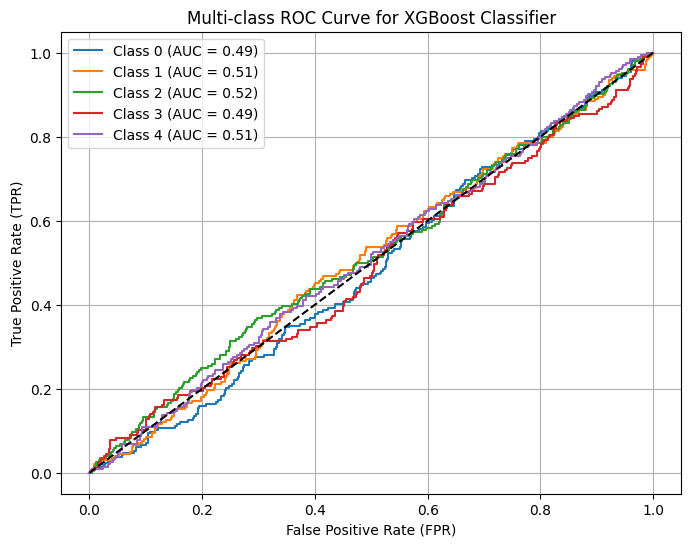

In [39]:
from sklearn.metrics import auc

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.title("Multi-class ROC Curve for XGBoost Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()

#### This saves the trained Random Forest model and the list of feature names using joblib, enabling future use without retraining.

In [41]:
import joblib

In [ ]:
feature_list = list(X.columns)
joblib.dump(feature_list, "features.pkl")

['features.pkl']

In [ ]:
joblib.dump(grid, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
joblib.dump(encoders, "encoder.pkl") 

['encoder.pkl']

In [ ]:
joblib.dump(scale, "scaler.pkl")

['scaler.pkl']

In [ ]:
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

In [ ]:
joblib.dump(target_encoder, "target_encoder.pkl")

['target_encoder.pkl']

#### This displays the mapping of original categorical values to their encoded numeric labels for each feature column.

In [42]:
for col, le in encoders.items():
    print(f"Mapping for {col}: {dict(zip(le.classes_, range(len(le.classes_))))}")

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Diagnosis: {'Cancer': 0, 'Diabetes': 1, 'Heart Disease': 2, 'Hypertension': 3, 'Influenza': 4}
Mapping for X_ray_Results: {'Abnormal': 0, 'Normal': 1}
Mapping for Surgery_Type: {'Angioplasty': 0, 'Appendectomy': 1, 'Cataract Surgery': 2, 'Gallbladder Removal': 3, 'Knee Replacement': 4}
Mapping for Allergies: {'Latex': 0, 'No_Allergies': 1, 'Peanuts': 2, 'Penicillin': 3, 'Shellfish': 4}
Mapping for Family_History: {"Alzheimer's": 0, 'Cancer': 1, 'Diabetes': 2, 'Heart Disease': 3, 'Hypertension': 4}


In [43]:
y_mapping = dict(zip(le_y.classes_, range(len(le_y.classes_))))
print("Target mapping:", y_mapping)

Target mapping: {'Antibiotics': 0, 'Aspirin': 1, 'Chemotherapy': 2, 'Insulin': 3, 'Statins': 4}
